<div style="text-align: center;">
    <h2>TOP DOG's Pizza Analysis</h2>
</div>


 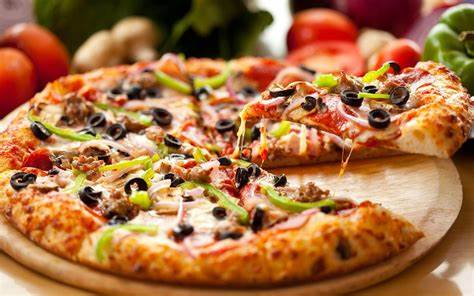

## Pizza Place Sales
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

## Recommended Analysis
* How many customers do we have each day? Are there any peak hours?

* How many pizzas are typically in an order? Do we have any bestsellers?

* How much money did we make this year? Can we indentify any seasonality in the sales?

* Are there any pizzas we should take of the menu, or any promotions we could leverage?

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [4]:
order = pd.read_csv('orders.csv')
order.head()

order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

In [7]:
order_details = pd.read_csv('order_details.csv')
order_details.head()

order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

In [9]:
pizzas = pd.read_csv('pizzas.csv')
pizzas.head()

pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

In [12]:
pizza_type = pd.read_csv('pizza_types.csv',encoding='latin1')
pizza_type.head()

pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...

In [14]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [15]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [17]:
pizza_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


## Feature Engineering

In [18]:
print(order.columns)
print(order_details.columns)
print(pizzas.columns)
print(pizza_type.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [22]:
pizza_df = order.merge(order_details,on='order_id').merge(pizzas,on='pizza_id').merge(pizza_type,on='pizza_type_id')
pizza_df.head()

order_id        date      time  order_details_id    pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1  hawaiian_m         1   
1        77  2015-01-02  12:22:46               179  hawaiian_m         1   
2       146  2015-01-03  14:22:10               357  hawaiian_m         1   
3       163  2015-01-03  16:54:54               389  hawaiian_m         1   
4       247  2015-01-04  20:55:29               568  hawaiian_m         1   

  pizza_type_id size  price                name category  \
0      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
1      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
2      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
3      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
4      hawaiian    M  13.25  The Hawaiian Pizza  Classic   

                                ingredients  
0  Sliced Ham, Pineapple, Mozzarella Cheese  
1  Sliced Ham, Pineapple, Mozzarella Cheese  
2  Sliced Ham, Pineapple, Mozzarella Cheese  
3  Sliced Ham, Pineapple, Mozzarella Cheese  
4  Sliced Ham, Pineapple, Mozzarella Cheese

In [23]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [31]:
pizza_df['date'] = pd.to_datetime(pizza_df.date)
pizza_df['month']= pizza_df['date'].dt.month
pizza_df['day'] = pizza_df['date'].dt.day_of_week + 1

In [32]:
pizza_df.day.unique()

array([4, 5, 6, 7, 2, 3, 1], dtype=int64)

In [40]:
pizza_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [35]:
pizza_df['hour'] = pd.to_datetime(pizza_df['time']).dt.hour

In [42]:
pizza_df.head()

order_id       date      time  order_details_id    pizza_id  quantity  \
0         1 2015-01-01  11:38:36                 1  hawaiian_m         1   
1        77 2015-01-02  12:22:46               179  hawaiian_m         1   
2       146 2015-01-03  14:22:10               357  hawaiian_m         1   
3       163 2015-01-03  16:54:54               389  hawaiian_m         1   
4       247 2015-01-04  20:55:29               568  hawaiian_m         1   

  pizza_type_id size  price                name category  \
0      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
1      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
2      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
3      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
4      hawaiian    M  13.25  The Hawaiian Pizza  Classic   

                                ingredients month       day  hour  
0  Sliced Ham, Pineapple, Mozzarella Cheese   Jan  Thursday    11  
1  Sliced Ham, Pineapple, Mozzarella Cheese   Jan    Friday    12  
2  Sliced Ham, Pineapple, Mozzarella Cheese   Jan  Saturday    14  
3  Sliced Ham, Pineapple, Mozzarella Cheese   Jan  Saturday    16  
4  Sliced Ham, Pineapple, Mozzarella Cheese   Jan    Sunday    20

In [38]:
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
pizza_df['day'] = pizza_df.day.map(day)

In [41]:
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

pizza_df['month'] = pizza_df.month.map(month)

In [43]:
pizza_df['sales'] = pizza_df['quantity']*pizza_df['price']

In [48]:
pizza_df.sample(5)

order_id       date      time  order_details_id       pizza_id  \
22934      4955 2015-03-25  13:10:57             11286   spin_pesto_m   
36261      1369 2015-01-23  18:31:59              3096  four_cheese_m   
8642        792 2015-01-14  12:37:48              1782     mexicana_l   
30872     11369 2015-07-09  16:39:34             25834    pepperoni_s   
24368     11136 2015-07-05  15:00:21             25306   veggie_veg_m   

       quantity pizza_type_id size  price                               name  \
22934         1    spin_pesto    M  16.50            The Spinach Pesto Pizza   
36261         1   four_cheese    M  14.75              The Four Cheese Pizza   
8642          1      mexicana    L  20.25                 The Mexicana Pizza   
30872         1     pepperoni    S   9.75                The Pepperoni Pizza   
24368         1    veggie_veg    M  16.00  The Vegetables + Vegetables Pizza   

      category                                        ingredients month  \
22934   Veggie  Spinach, Artichokes, Tomatoes, Sun-dried Tomat...   Mar   
36261   Veggie  Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...   Jan   
8642    Veggie  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   Jan   
30872  Classic                       Mozzarella Cheese, Pepperoni   Jul   
24368   Veggie  Mushrooms, Tomatoes, Red Peppers, Green Pepper...   Jul   

             day  hour  sales  
22934  Wednesday    13  16.50  
36261     Friday    18  14.75  
8642   Wednesday    12  20.25  
30872   Thursday    16   9.75  
24368     Sunday    15  16.00

## Recommended Analysis
* How many customers do we have each day? Are there any peak hours?

* How many pizzas are typically in an order? Do we have any bestsellers?

* How much money did we make this year? Can we indentify any seasonality in the sales?

* Are there any pizzas we should take of the menu, or any promotions we could leverage?

## how many pizzas were sold in the year 2015?

In [51]:
pizza_df.quantity.sum()

49574

In [84]:
pizza_df[pizza_df['order_id'].duplicated()]

order_id       date      time  order_details_id      pizza_id  \
550        1639 2015-01-28  13:37:57              3692    hawaiian_s   
573        2188 2015-02-06  13:13:33              4945    hawaiian_s   
693        4580 2015-03-18  18:11:13             10457    hawaiian_s   
704        4749 2015-03-21  14:46:54             10850    hawaiian_s   
732        5441 2015-04-02  11:53:01             12378    hawaiian_s   
...         ...        ...       ...               ...           ...   
48614     21129 2015-12-26  18:12:56             48071  brie_carre_s   
48615     21167 2015-12-27  17:39:57             48176  brie_carre_s   
48616     21198 2015-12-28  15:39:02             48244  brie_carre_s   
48617     21225 2015-12-29  13:20:17             48311  brie_carre_s   
48619     21308 2015-12-31  16:44:35             48527  brie_carre_s   

       quantity pizza_type_id size  price                  name category  \
550           1      hawaiian    S  10.50    The Hawaiian Pizza  Classic   
573           1      hawaiian    S  10.50    The Hawaiian Pizza  Classic   
693           1      hawaiian    S  10.50    The Hawaiian Pizza  Classic   
704           1      hawaiian    S  10.50    The Hawaiian Pizza  Classic   
732           1      hawaiian    S  10.50    The Hawaiian Pizza  Classic   
...         ...           ...  ...    ...                   ...      ...   
48614         1    brie_carre    S  23.65  The Brie Carre Pizza  Supreme   
48615         1    brie_carre    S  23.65  The Brie Carre Pizza  Supreme   
48616         1    brie_carre    S  23.65  The Brie Carre Pizza  Supreme   
48617         1    brie_carre    S  23.65  The Brie Carre Pizza  Supreme   
48619         1    brie_carre    S  23.65  The Brie Carre Pizza  Supreme   

                                             ingredients month        day  \
550             Sliced Ham, Pineapple, Mozzarella Cheese   Jan  Wednesday   
573             Sliced Ham, Pineapple, Mozzarella Cheese   Feb     Friday   
693             Sliced Ham, Pineapple, Mozzarella Cheese   Mar  Wednesday   
704             Sliced Ham, Pineapple, Mozzarella Cheese   Mar   Saturday   
732             Sliced Ham, Pineapple, Mozzarella Cheese   Apr   Thursday   
...                                                  ...   ...        ...   
48614  Brie Carre Cheese, Prosciutto, Caramelized Oni...   Dec   Saturday   
48615  Brie Carre Cheese, Prosciutto, Caramelized Oni...   Dec     Sunday   
48616  Brie Carre Cheese, Prosciutto, Caramelized Oni...   Dec     Monday   
48617  Brie Carre Cheese, Prosciutto, Caramelized Oni...   Dec    Tuesday   
48619  Brie Carre Cheese, Prosciutto, Caramelized Oni...   Dec   Thursday   

       hour  sales  
550      13  10.50  
573      13  10.50  
693      18  10.50  
704      14  10.50  
732      11  10.50  
...     ...    ...  
48614    18  23.65  
48615    17  23.65  
48616    15  23.65  
48617    13  23.65  
48619    16  23.65  

[27270 rows x 16 columns]

## How many days did the restaurant operated in the year?

In [79]:
pizza_df[~(pizza_df['date'].duplicated())].count()[1]

358

## How many orders were placed  in the year under review?

## Yearly 

In [83]:
pizza_df['order_id'].drop_duplicates().count()

21350

## Monthly

In [85]:
pizza_df['order_id'].drop_duplicates().count()/12

1779.1666666666667

## Daily

In [81]:
(pizza_df[~(pizza_df['order_id'].duplicated())].count()[0]) /(pizza_df[~(pizza_df['date'].duplicated())].count()[1])

59.63687150837989

## How many pizzas were sold?

## Yearly

In [136]:
pizza_df.quantity.sum()

49574

## Monthly

In [137]:
pizza_df.quantity.sum()/12

4131.166666666667

## Daily

In [138]:
pizza_df.quantity.sum()/358

138.47486033519553

## How much money was made?

## Yearly

In [87]:
pizza_df.sales.sum()

817860.05

## Monthly

In [88]:
pizza_df.sales.sum()/12

68155.00416666667

## Daily

In [89]:
pizza_df.sales.sum()/358

2284.525279329609

## Which days are we Busy?

In [134]:
day_df = pd.DataFrame(pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)).reset_index()

day_df['quantity_percent'] = round(day_df['quantity']/day_df['quantity'].sum()*100,2)
day_df.head()

day  quantity  quantity_percent
0     Friday      8242             16.63
1   Saturday      7493             15.11
2   Thursday      7478             15.08
3  Wednesday      6946             14.01
4    Tuesday      6895             13.91

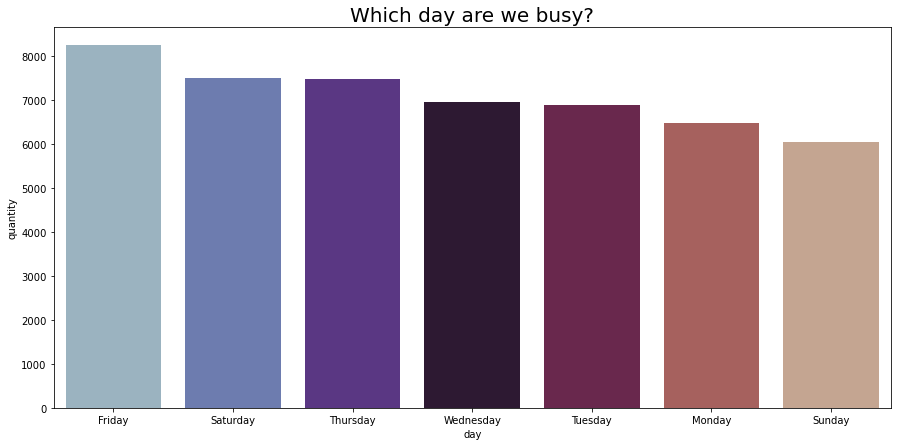

In [135]:
plt.figure(figsize=(15,7))
sns.barplot(data=day_df,x='day',y='quantity',palette='twilight')
plt.title('Which day are we busy?',fontsize=20);

## Which Day did we make more Money?

In [146]:
day_sales_df = pd.DataFrame(pizza_df.groupby('day')['sales'].sum().sort_values(ascending=False)).reset_index()

day_sales_df['sales_percent'] = round(day_sales_df['sales']/day_sales_df['sales'].sum()*100,2)
day_sales_df.head()

day     sales  sales_percent
0     Friday  136073.9          16.64
1   Thursday  123528.5          15.10
2   Saturday  123182.4          15.06
3  Wednesday  114408.4          13.99
4    Tuesday  114133.8          13.96

''

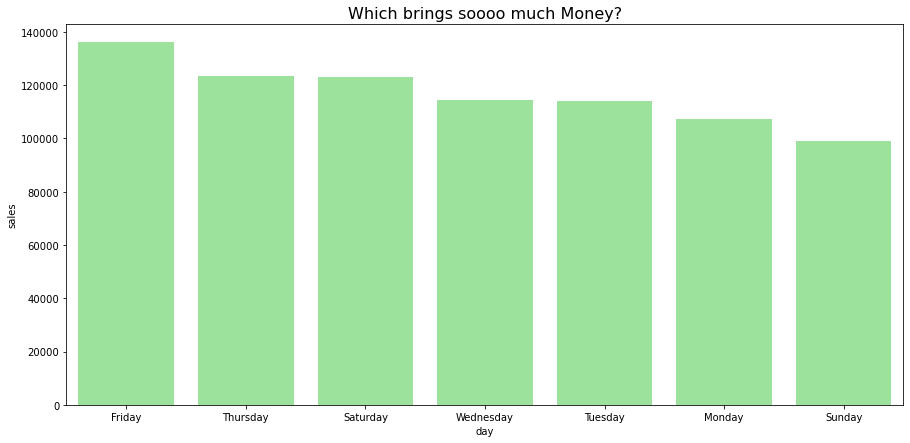

In [147]:
plt.figure(figsize=(15,7))
sns.barplot(data=day_sales_df,x='day',y='sales',palette=['lightgreen'])
plt.title('Which brings soooo much Money?',fontsize=16)
;

In [148]:
pizza_df.columns

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'month', 'day', 'hour', 'sales'],
      dtype='object')

## How many differenty pizzas do we sell?

In [152]:
pizza_df.name.nunique()

32

In [160]:
pizza_rank = pd.DataFrame(pizza_df.groupby('name')['quantity'].sum().sort_values(ascending=False)).reset_index()
pizza_rank['percent %'] =round(pizza_rank['quantity']/pizza_rank['quantity'].sum()*100,2)
pizza_rank.head()

name  quantity  percent %
0    The Classic Deluxe Pizza      2453       4.95
1  The Barbecue Chicken Pizza      2432       4.91
2          The Hawaiian Pizza      2422       4.89
3         The Pepperoni Pizza      2418       4.88
4      The Thai Chicken Pizza      2371       4.78

## The Top 3 Selling Pizzas

In [163]:
pizza_rank.head(3)

name  quantity  percent %
0    The Classic Deluxe Pizza      2453       4.95
1  The Barbecue Chicken Pizza      2432       4.91
2          The Hawaiian Pizza      2422       4.89

## The Worst 3 Selling Pizza

In [164]:
pizza_rank.tail(3)

name  quantity  percent %
29      The Calabrese Pizza       937       1.89
30  The Mediterranean Pizza       934       1.88
31     The Brie Carre Pizza       490       0.99

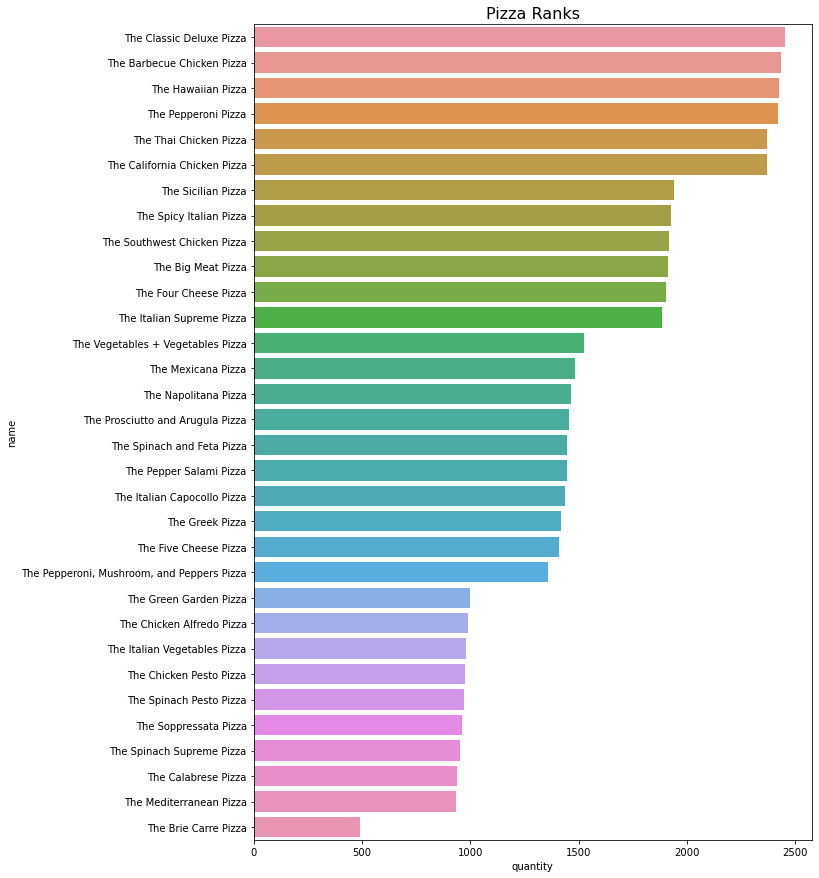

In [170]:
plt.figure(figsize=(10,15))
sns.barplot(data=pizza_rank,y='name',x='quantity',orient='h')
plt.title('Pizza Ranks',fontsize=16);

In [177]:
sales_rank=pd.DataFrame(pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False)).reset_index()
sales_rank['percent%'] = round(sales_rank['sales']/sales_rank['sales'].sum()*100,2)


## Top 5 Profitable Pizzas

In [178]:
sales_rank.head()

name     sales  percent%
0        The Thai Chicken Pizza  43434.25      5.31
1    The Barbecue Chicken Pizza  42768.00      5.23
2  The California Chicken Pizza  41409.50      5.06
3      The Classic Deluxe Pizza  38180.50      4.67
4       The Spicy Italian Pizza  34831.25      4.26

## 5 Least Profitable Pizzas

In [179]:
sales_rank.tail()

name     sales  percent%
27    The Spinach Pesto Pizza  15596.00      1.91
28    The Mediterranean Pizza  15360.50      1.88
29  The Spinach Supreme Pizza  15277.75      1.87
30     The Green Garden Pizza  13955.75      1.71
31       The Brie Carre Pizza  11588.50      1.42

In [180]:
pizza_rank

name  quantity  percent %
0                     The Classic Deluxe Pizza      2453       4.95
1                   The Barbecue Chicken Pizza      2432       4.91
2                           The Hawaiian Pizza      2422       4.89
3                          The Pepperoni Pizza      2418       4.88
4                       The Thai Chicken Pizza      2371       4.78
5                 The California Chicken Pizza      2370       4.78
6                           The Sicilian Pizza      1938       3.91
7                      The Spicy Italian Pizza      1924       3.88
8                  The Southwest Chicken Pizza      1917       3.87
9                           The Big Meat Pizza      1914       3.86
10                       The Four Cheese Pizza      1902       3.84
11                   The Italian Supreme Pizza      1884       3.80
12           The Vegetables + Vegetables Pizza      1526       3.08
13                          The Mexicana Pizza      1484       2.99
14                        The Napolitana Pizza      1464       2.95
15            The Prosciutto and Arugula Pizza      1457       2.94
16                  The Spinach and Feta Pizza      1446       2.92
17                     The Pepper Salami Pizza      1446       2.92
18                 The Italian Capocollo Pizza      1438       2.90
19                             The Greek Pizza      1420       2.86
20                       The Five Cheese Pizza      1409       2.84
21  The Pepperoni, Mushroom, and Peppers Pizza      1359       2.74
22                      The Green Garden Pizza       997       2.01
23                   The Chicken Alfredo Pizza       987       1.99
24                The Italian Vegetables Pizza       981       1.98
25                     The Chicken Pesto Pizza       973       1.96
26                     The Spinach Pesto Pizza       970       1.96
27                       The Soppressata Pizza       961       1.94
28                   The Spinach Supreme Pizza       950       1.92
29                         The Calabrese Pizza       937       1.89
30                     The Mediterranean Pizza       934       1.88
31                        The Brie Carre Pizza       490       0.99

In [195]:
pd.DataFrame({'name':['fuu','dd'],'age':[12,33]})

name  age
0  fuu   12
1   dd   33

In [194]:
pizza_df.groupby('name')['quantity','sales'].sum()

C:\Users\MTL9\AppData\Local\Temp\ipykernel_39376\3742864052.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pizza_df.groupby('name')['quantity','sales'].sum()


quantity     sales
name                                                          
The Barbecue Chicken Pizza                      2432  42768.00
The Big Meat Pizza                              1914  22968.00
The Brie Carre Pizza                             490  11588.50
The Calabrese Pizza                              937  15934.25
The California Chicken Pizza                    2370  41409.50
The Chicken Alfredo Pizza                        987  16900.25
The Chicken Pesto Pizza                          973  16701.75
The Classic Deluxe Pizza                        2453  38180.50
The Five Cheese Pizza                           1409  26066.50
The Four Cheese Pizza                           1902  32265.70
The Greek Pizza                                 1420  28454.10
The Green Garden Pizza                           997  13955.75
The Hawaiian Pizza                              2422  32273.25
The Italian Capocollo Pizza                     1438  25094.00
The Italian Supreme Pizza                       1884  33476.75
The Italian Vegetables Pizza                     981  16019.25
The Mediterranean Pizza                          934  15360.50
The Mexicana Pizza                              1484  26780.75
The Napolitana Pizza                            1464  24087.00
The Pepper Salami Pizza                         1446  25529.00
The Pepperoni Pizza                             2418  30161.75
The Pepperoni, Mushroom, and Peppers Pizza      1359  18834.50
The Prosciutto and Arugula Pizza                1457  24193.25
The Sicilian Pizza                              1938  30940.50
The Soppressata Pizza                            961  16425.75
The Southwest Chicken Pizza                     1917  34705.75
The Spicy Italian Pizza                         1924  34831.25
The Spinach Pesto Pizza                          970  15596.00
The Spinach Supreme Pizza                        950  15277.75
The Spinach and Feta Pizza                      1446  23271.25
The Thai Chicken Pizza                          2371  43434.25
The Vegetables + Vegetables Pizza               1526  24374.75

In [185]:
dff = pd.DataFrame(pizza_df.groupby('name')['quantity','sales'].sum().reset_index())

C:\Users\MTL9\AppData\Local\Temp\ipykernel_39376\1206254123.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dff = pd.DataFrame(pizza_df.groupby('name')['quantity','sales'].sum().reset_index())


In [193]:
dff

name  quantity     sales
0                   The Barbecue Chicken Pizza      2432  42768.00
1                           The Big Meat Pizza      1914  22968.00
2                         The Brie Carre Pizza       490  11588.50
3                          The Calabrese Pizza       937  15934.25
4                 The California Chicken Pizza      2370  41409.50
5                    The Chicken Alfredo Pizza       987  16900.25
6                      The Chicken Pesto Pizza       973  16701.75
7                     The Classic Deluxe Pizza      2453  38180.50
8                        The Five Cheese Pizza      1409  26066.50
9                        The Four Cheese Pizza      1902  32265.70
10                             The Greek Pizza      1420  28454.10
11                      The Green Garden Pizza       997  13955.75
12                          The Hawaiian Pizza      2422  32273.25
13                 The Italian Capocollo Pizza      1438  25094.00
14                   The Italian Supreme Pizza      1884  33476.75
15                The Italian Vegetables Pizza       981  16019.25
16                     The Mediterranean Pizza       934  15360.50
17                          The Mexicana Pizza      1484  26780.75
18                        The Napolitana Pizza      1464  24087.00
19                     The Pepper Salami Pizza      1446  25529.00
20                         The Pepperoni Pizza      2418  30161.75
21  The Pepperoni, Mushroom, and Peppers Pizza      1359  18834.50
22            The Prosciutto and Arugula Pizza      1457  24193.25
23                          The Sicilian Pizza      1938  30940.50
24                       The Soppressata Pizza       961  16425.75
25                 The Southwest Chicken Pizza      1917  34705.75
26                     The Spicy Italian Pizza      1924  34831.25
27                     The Spinach Pesto Pizza       970  15596.00
28                   The Spinach Supreme Pizza       950  15277.75
29                  The Spinach and Feta Pizza      1446  23271.25
30                      The Thai Chicken Pizza      2371  43434.25
31           The Vegetables + Vegetables Pizza      1526  24374.75

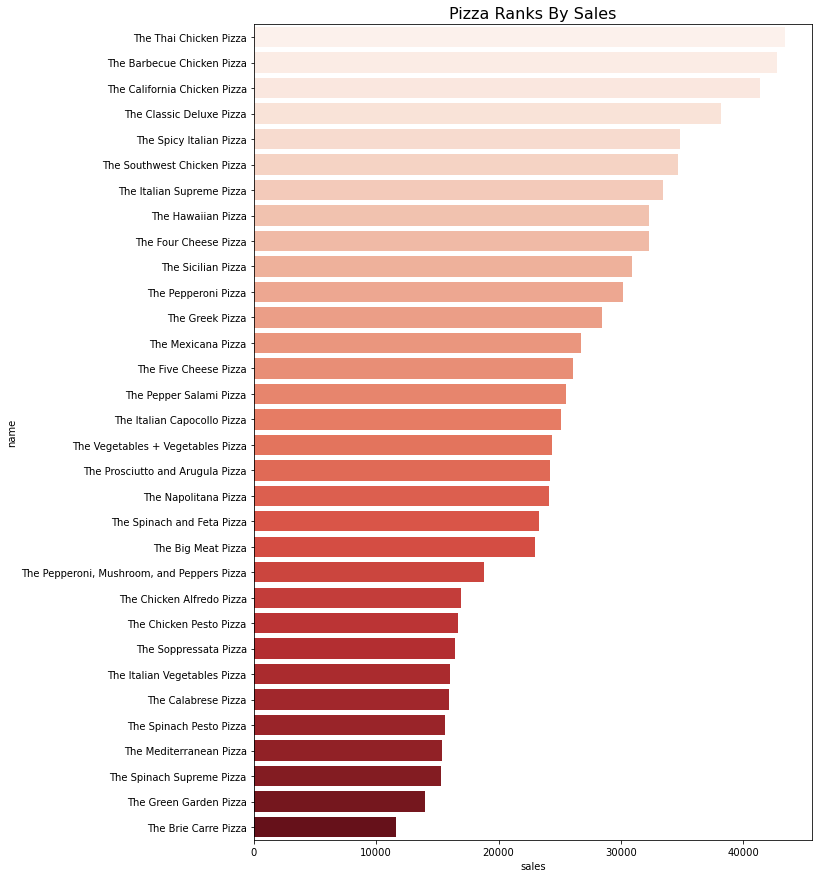

In [198]:
plt.figure(figsize=(10,15))
sns.barplot(data=sales_rank,y='name',x='sales',orient='h',palette='Reds')
plt.title('Pizza Ranks By Sales',fontsize=16);

In [196]:
pizza_df.columns

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'month', 'day', 'hour', 'sales'],
      dtype='object')

In [201]:
pizza_df['size'].unique()

array(['M', 'S', 'L', 'XL', 'XXL'], dtype=object)

In [210]:
size_df = pizza_df.groupby('size')[['quantity','sales']].sum().reset_index()

size_df['percent'] = round(size_df['quantity']/size_df['quantity'].sum()*100,2)
size_df

size  quantity      sales  percent
0    L     18956  375318.70    38.24
1    M     15635  249382.25    31.54
2    S     14403  178076.50    29.05
3   XL       552   14076.00     1.11
4  XXL        28    1006.60     0.06

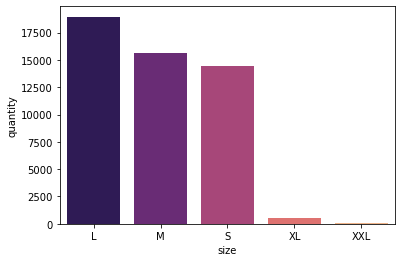

In [212]:
sns.barplot(data=size_df,x='size',y='quantity',palette='magma');

In [214]:
pizza_df.category.unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [218]:
category_df = pd.DataFrame(pizza_df.groupby('category')['quantity'].sum()).reset_index()

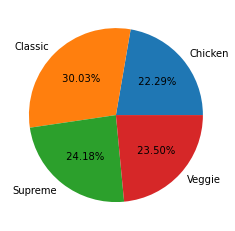

In [221]:
plt.pie(category_df['quantity'],labels=category_df['category'],autopct='% .2f%%');

In [222]:
pizza_df.ingredients

0                 Sliced Ham, Pineapple, Mozzarella Cheese
1                 Sliced Ham, Pineapple, Mozzarella Cheese
2                 Sliced Ham, Pineapple, Mozzarella Cheese
3                 Sliced Ham, Pineapple, Mozzarella Cheese
4                 Sliced Ham, Pineapple, Mozzarella Cheese
                               ...                        
48615    Brie Carre Cheese, Prosciutto, Caramelized Oni...
48616    Brie Carre Cheese, Prosciutto, Caramelized Oni...
48617    Brie Carre Cheese, Prosciutto, Caramelized Oni...
48618    Brie Carre Cheese, Prosciutto, Caramelized Oni...
48619    Brie Carre Cheese, Prosciutto, Caramelized Oni...
Name: ingredients, Length: 48620, dtype: object

In [223]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [224]:
from wordcloud import WordCloud

In [225]:
wordc = WordCloud()

In [226]:
?WordCloud

In [228]:
text = ' '.join(pizza_df.ingredients)

In [229]:
wordc.generate(text)

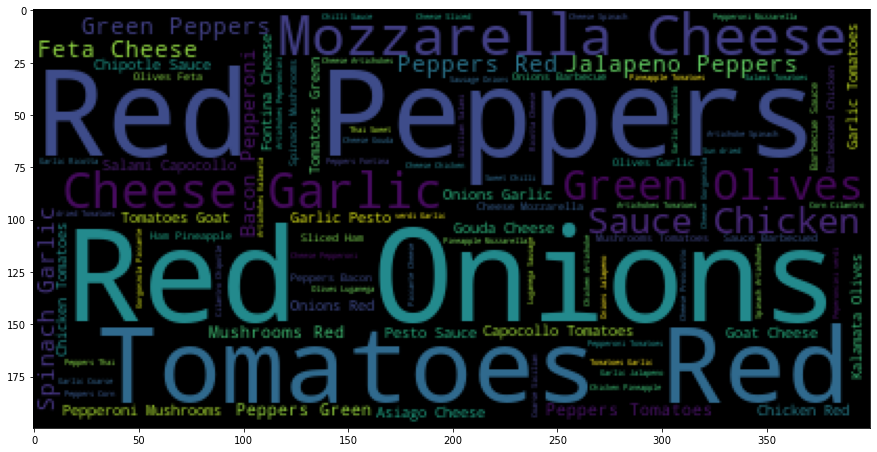

In [231]:
plt.figure(figsize=(15,10))
plt.imshow(wordc)

In [234]:
wc=WordCloud(max_words=100,background_color='lightblue',width=1000,height=800).generate(text)

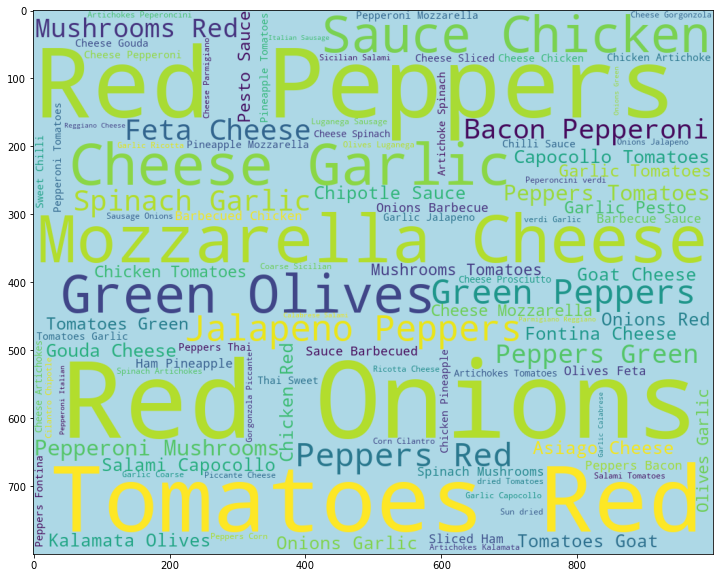

In [236]:
plt.figure(figsize=(15,10))
plt.imshow(wc)

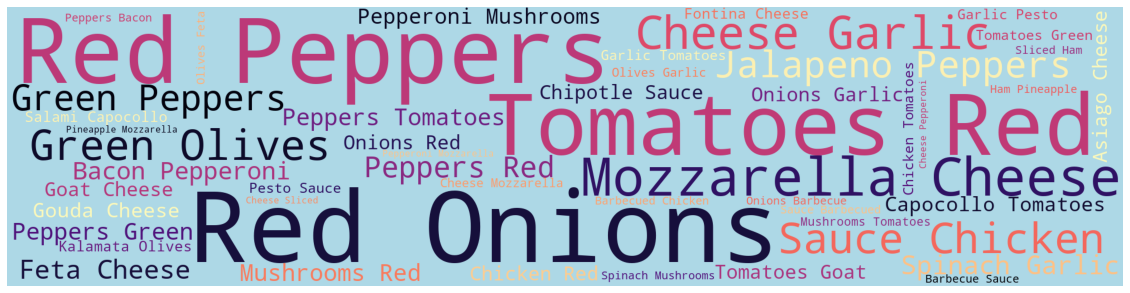

In [253]:
wordcc = WordCloud(max_words=50,colormap='magma',background_color='lightblue',width=2000,height=500).generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcc)
plt.axis('off')
plt.savefig('lll.png',dpi=300)
plt.show()

In [243]:
import numpy as np
from PIL import Image

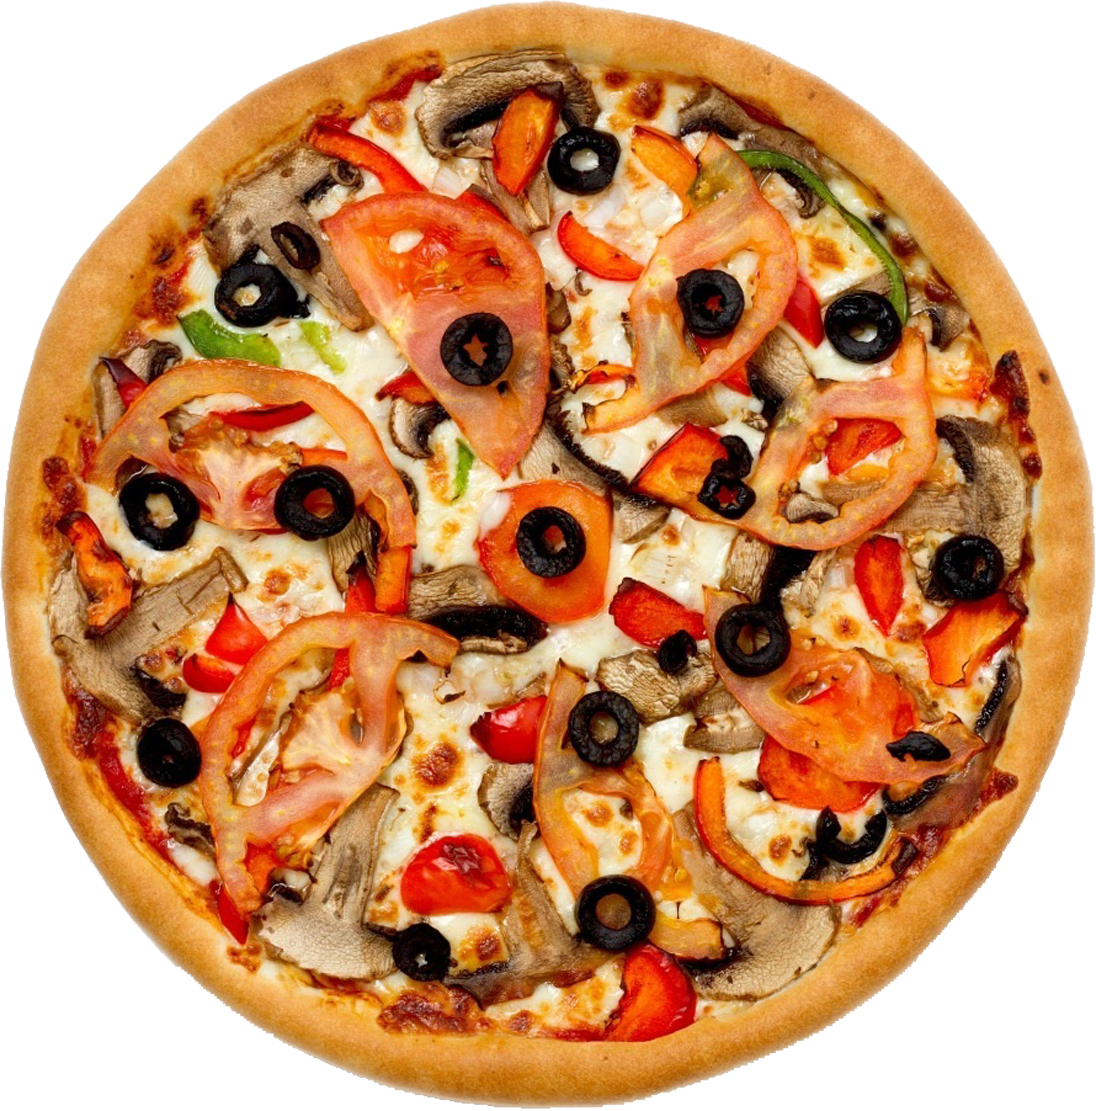

In [244]:
Image.open('ppp.png')

In [246]:
im = np.array(Image.open('ppp.png'))

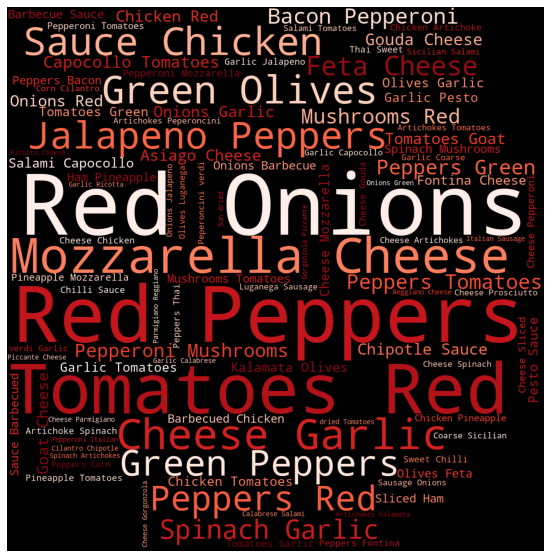

In [248]:
wordcc = WordCloud(max_words=100,colormap='Reds',background_color=None,width=2000,height=500,mask=im).generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcc)
plt.axis('off')
plt.show()